In [35]:
import pandas as pd

In [36]:
data = pd.read_csv('my_music_preprocessed.csv')

In [37]:
data.TITLE = data.TITLE.str.replace('$', 's')

In [38]:
data.ARTIST = data.ARTIST.str.replace('$', 's')

In [39]:
data.head()

,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
0,Give You Up - Darius Remix,Crayon,2013,108,51,85,-9,66,325.0,37,49
1,Feelin' Good - Edit,Laurent Garnier,2019,126,71,59,-13,37,274.0,0,35
2,Under The Moon - Cassius Remix - Edit,Claptone,2018,121,51,78,-11,12,234.0,1,56
3,Imported Goods,Action Bronson,2010,93,94,62,-6,68,250.0,16,46
4,Easy Rider,Action Bronson,2015,94,85,42,-4,67,259.0,3,52


In [40]:
x = data.drop(['TITLE', 'ARTIST', 'RELEASE'], axis = 1)

In [41]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, init='pca').fit_transform(x)

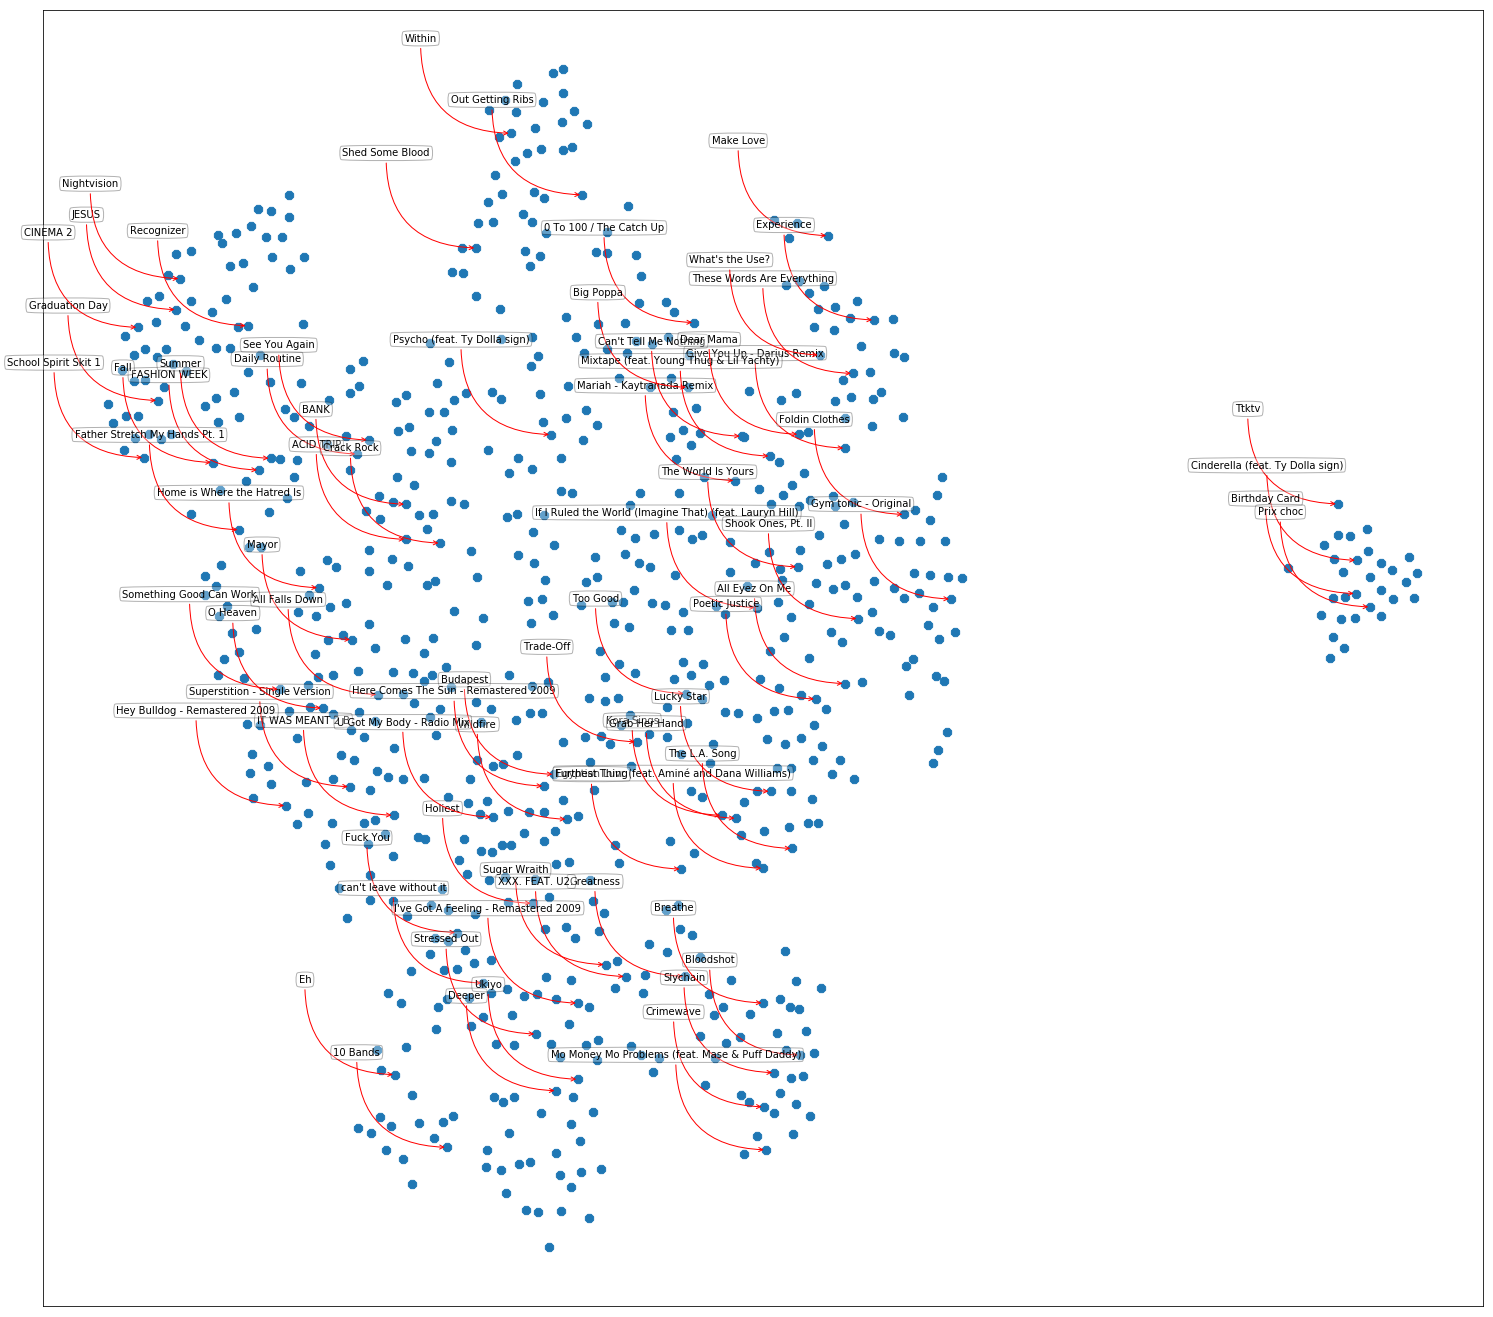

In [50]:
from matplotlib.pyplot import *
fig = figure(figsize=(20, 20))
ax = axes(frameon=True)
setp(ax, xticks=(), yticks=())
subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9,
                wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], s=80,   marker="8")

for row_id in range(0, len(data)):
    #if (df.ARTIST[row_id] in ['The National']):
        target_word = data.TITLE[row_id]
        xx = X_embedded[row_id, 0]
        yy = X_embedded[row_id, 1]
        if row_id%10 == 0:
            annotate(target_word, (xx,yy), size=10, xytext=(-90,90), 
                textcoords='offset points', ha='center', va='bottom',
                bbox=dict(boxstyle='round4', fc='white', alpha=0.3),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5', 
                                color='red'))

In [43]:
data.iloc[X_embedded[:,0].argmin(),:]

TITLE       AFRICAN DRAGON
ARTIST         Rejjie Snow
RELEASE               2017
BPM                     73
ENERGY                  54
DANCE                   47
LOUD                   -13
VALENCE                 21
LENGTH                  25
ACOUSTIC                35
POP                      0
Name: 91, dtype: object

In [44]:
data.iloc[X_embedded[:,0].argmax(),:]

TITLE       Third Eye Sh*t (feat. Pro Era, Capital STEEZ, ...
ARTIST                                            Joey Badass
RELEASE                                                  2012
BPM                                                       129
ENERGY                                                     67
DANCE                                                      61
LOUD                                                       -6
VALENCE                                                    72
LENGTH                                                    707
ACOUSTIC                                                   62
POP                                                        43
Name: 85, dtype: object

In [45]:
data.iloc[X_embedded[:,1].argmax(),:]

TITLE          Finale
ARTIST      Daft Punk
RELEASE          2010
BPM                62
ENERGY             10
DANCE               8
LOUD              -15
VALENCE             3
LENGTH            263
ACOUSTIC           93
POP                31
Name: 378, dtype: object

In [46]:
data.iloc[X_embedded[:,1].argmin(),:]

TITLE            UNBORN
ARTIST      Rejjie Snow
RELEASE            2017
BPM                 170
ENERGY               37
DANCE                79
LOUD                 -8
VALENCE              79
LENGTH              193
ACOUSTIC             33
POP                  21
Name: 89, dtype: object

In [48]:
data.iloc[data.DANCE.idxmax(),:]

TITLE        good day
ARTIST      21 Savage
RELEASE          2018
BPM               122
ENERGY             52
DANCE              97
LOUD               -6
VALENCE            12
LENGTH            242
ACOUSTIC            0
POP                54
Name: 43, dtype: object

In [51]:
data.loc[data.DANCE > 90]

,TITLE,ARTIST,RELEASE,BPM,ENERGY,DANCE,LOUD,VALENCE,LENGTH,ACOUSTIC,POP
36,a&t,21 Savage,2018,147,57,92,-5,83,212.0,0,58
43,good day,21 Savage,2018,122,52,97,-6,12,242.0,0,54
44,pad lock,21 Savage,2018,130,55,96,-8,80,191.0,2,57
49,CHANCES (INSTRUMENTAL),KAYTRANADA,2018,106,44,95,-8,66,218.0,6,19
119,Annie,Rejjie Snow,2018,124,60,95,-5,45,244.0,0,27
175,JELLO,BROCKHAMPTON,2017,140,57,92,-7,64,240.0,62,53
208,FACE,BROCKHAMPTON,2017,120,70,95,-5,68,259.0,59,66
302,Lost,Frank Ocean,2012,123,60,91,-5,49,234.0,3,63
465,Around the World - Radio Edit [Radio Edit],Daft Punk,2006,121,76,93,-6,86,241.0,0,50
548,Around the World,Daft Punk,1997,121,80,96,-5,84,430.0,0,67
